In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv


# **Hi there!**
**In this notebook, we will do some analysis and data understanding of the dengue disease in the Philippines.
So, let's go!**

# **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# **Importing the data**

In [3]:
df = pd.read_csv('../input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv')

In [4]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [7]:
df.isna().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

**obviously, the data is clean already, with no missing values, and no data preprocessing is needed so far "of course, if we need to apply an ML model we will need some processing to this data ;)"!So let's head to the analysis part.**

# **Analysis and EDA**

In [8]:
#just checking for the region column in the dataset
np.unique(df['Region'])

array(['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III',
       'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI',
       'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII',
       'Region XIII'], dtype=object)

In [9]:
corelation = df.corr()
corelation

,Year,Dengue_Cases,Dengue_Deaths
Year,1.000000,0.021167,-0.120163
Dengue_Cases,0.021167,1.000000,0.038322
Dengue_Deaths,-0.120163,0.038322,1.000000


<AxesSubplot:>

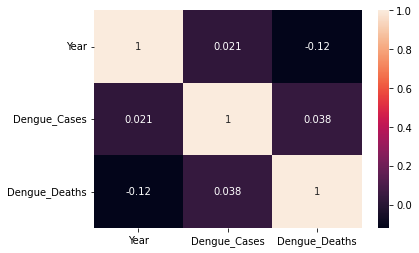

In [10]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

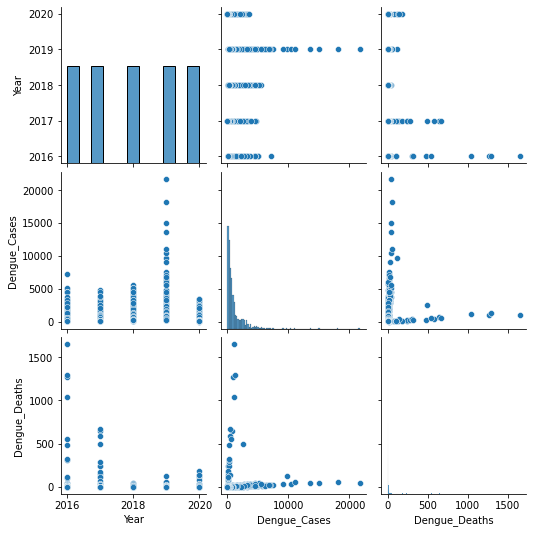

In [11]:
sns.pairplot(df)

**Cases from 2016-2020**

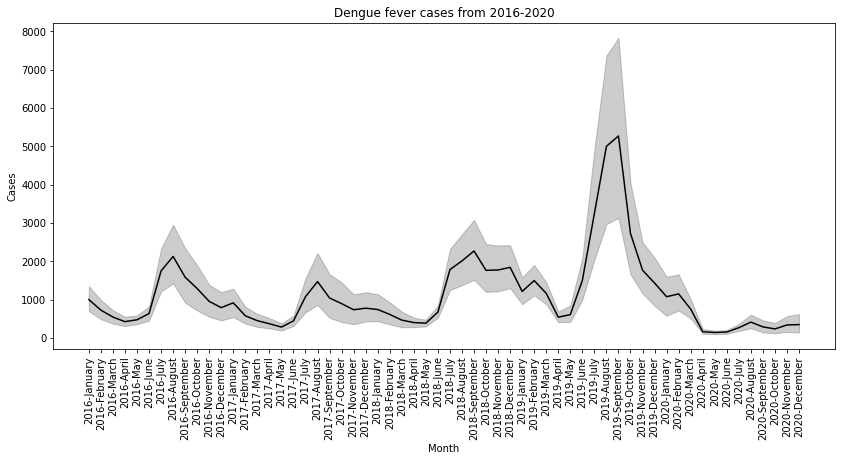

In [12]:
index = 0
monthYears = []
years = [i for i in df.Year]
for i in df.Month:
    monthYears.append(str(years[index])+'-'+str(i))
    index += 1
plt.figure(figsize=(14,6))
sns.lineplot(x=monthYears,y=[i for i in df['Dengue_Cases']],color='black')
plt.title(label='Dengue fever cases from 2016-2020')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Cases')
plt.xticks(rotation=90)
plt.show()

# **Now the data is so obvious**
**In case we want to make a predection, you are ready for this!**